In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras.models import model_from_json
from sklearn.preprocessing import LabelEncoder
import glob
#from read_plate import *
from helper import * 


Using TensorFlow backend.


In [2]:
image_paths = glob.glob("../Data/*.jpg")
print("Found %i images..."%(len(image_paths)))


Found 18 images...


## Load Models

### Plate detection model

In [3]:
model_path=os.path.join(os.getcwd(),"wpod-net.json")
wpod_net = load_model(model_path)

Loading model successfully...


### Character classification model

In [4]:
# Load model architecture, weight and labels
json_file = open('MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")

labels = LabelEncoder()
labels.classes_ = np.load('license_character_classes.npy')
print("[INFO] Labels loaded successfully...")

[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


## Test Data

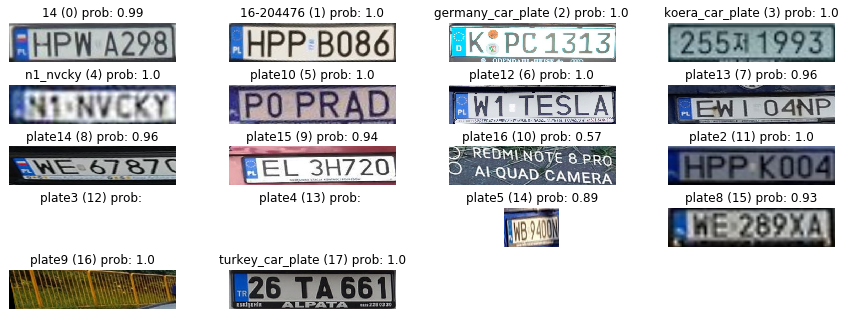

In [4]:
# Viualize all obtained plate images 
fig = plt.figure(figsize=(12,7))
cols = 4
rows = 8
fig_list = []

for i in range(len(image_paths)):
    LpImg,_,L = get_plate(image_paths[i],wpod_net =wpod_net)
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    prob=''
    if L!=[]: prob=round(L[0],2)
    title = splitext(basename(image_paths[i]))[0] +' ('+ str(i)+')' + ' prob: '+ str(prob)
    fig_list[-1].set_title(title)
    plt.axis(False)
    try:plt.imshow(LpImg[0])
    except: next

plt.tight_layout(True)
plt.show()

In [5]:
test_image = image_paths[0]

LpImg, cor, L =get_plate(test_image,wpod_net=wpod_net)


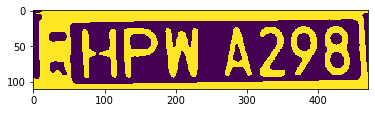

In [6]:
plate_image= cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
test_roi = plate_image.copy()
    # convert to grayscale and blur the image
gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),200)
    # Applied inversed thresh_binary 
binary = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(binary)

havent found any characters -  cutting margings


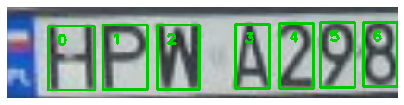

In [7]:
test_roi, myboxes, crop_characters, crop_characters_orig = make_boxes(LpImg)

fig = plt.figure(figsize=(7,6))
plt.axis(False)
plt.imshow(test_roi)

#plate_image= cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
#crop_characters = []
#crop_characters_orig=[]




HPNA298


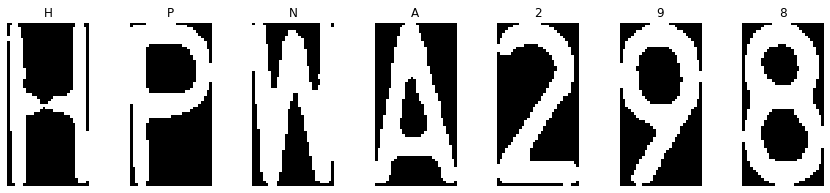

In [8]:
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    #plt.imshow(crop_characters_orig[i],cmap='gray')
    plt.imshow(character,cmap='gray')
print(final_string)
#plt.savefig('final_result.png', dpi=300)

In [15]:
final_string

'UC289YA'

 # Other options
 

In [11]:
# conda config --add channels conda-forge  -- not working
# conda install shapely                    -- not working
#!pip install keras-ocr                    -- not working

#conda install shapely=1.6.4

In [3]:
from shapely import *
import keras_ocr

OSError: [WinError 126] The specified module could not be found

In [ ]:
import keras_ocr
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(im) for im in image_paths
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)